# <center> Artificial Intelligence in Robotics - Laboratory 2 </center>
### <center> By Lennard Rose 5122737 </center>

## <center> T 1 – Sample From a Normal Distribution </center>
##### Implement two functions in Python that draw samples from a normal distribution N(µ, σ2). The input parameters of these functions should be the mean µ and the standard deviation σ of the normal distribution. The only source of randomness should be samples from the numpy.random.uniform function. A framework containing stubs of both functions is provided to you with lab_2_t_1_framework.py (*Lab 2 Framework Part 1.py renamed to lab_2_t_1_framework.py). Hint: Use the Python module math to optimize the execution times of your implementations.
##### • In the first function, draw samples from a zero-centered normal distribution by summing up 12 uniform distributed samples, as defined in the lecture. To convert from a zero-centered distribution to another normal distribution, add the mean µ.
##### • Use the Box-Muller transformation method in the second function. The Box-Muller method allows to draw samples from a standard normal distribution using the following equation:
##### $$x = \cos(2 \pi u_1) \sqrt{(−2 \log(u_2))}$$
##### u1, u2 ∈ [0, 1) are two uniformly distributed samples. The samples x from the standard normal distribution can be converted to those of another normal distribution by multiplying them by the standard deviation σ and adding the mean µ.
##### Using the compute_execution_times function in lab_2_t_1_framework.py to draw 10.000 samples with the parameters µ = 10 and σ = 4, answer the following questions:

In [1]:
main()

Computing execution times as well as sample means and std_devs with:
 mean : 10.0
 std_dev : 4.0
 samples no: 10000
         sample_twelve_uniform : 19.647 us
    sample_boxmuller_transform : 4.467 us
                        normal : 1.853 us
         sample_twelve_uniform : mean = 9.949, std_dev = 4.047
    sample_boxmuller_transform : mean = 10.018, std_dev = 3.994
                        normal : mean = 10.033, std_dev = 4.021


### <center> 1.a [1.5 marks] </center>
##### What are the execution times of the two functions in µs? Comment on how the times compare to each other.

Comparing the average time per sample, the sample_twelve_uniform method is by far slower than the sample_boxmuller_transform method. This was to my surprise because I expected the computation of several trigonometric functions more complex than simply drawing from a uniform distribution a couple of times and executing some basic arithmetic operations.

### <center> 1.b [0.5 marks] </center>
##### What is the execution time of the built-in function numpy.random.normal in µs? Comment on how it compares to the times of your own functions.

On my computer the built-in function numpy.random.normal runs more than two times faster than the sample_boxmuller_transform method and more than ten times faster than the sample_twelve_uniform method. This might be because it is probably written in c and wrapped in python as well as the fact that it was written by some super smart people to make a living and not by a master student to gain 3 marks :)

### <center> 1.c [0.5 marks] & 1.d [0.5 marks] </center>
##### What are the means and standard deviations of the samples drawn using each of your two functions? Comment on how they compare to the parameters of the true normal distribution.
##### What is the mean and standard deviation of the samples drawn using numpy.random. normal? Comment on how their accuracy compares to the sample means and standard deviations of your own implementations.

All three methods provide a sufficient way to generate samples. Even when running the program multiple times, none of the methods deviates more than 5% from the true values.

## <center> T 2 – Sample Odometry Motion Model </center>
##### A working motion model is a prerequisite for all Bayes Filter implementations. In the following, you will implement the sample odometry motion model as presented in the lecture ”‘Probabilistic Motion Models – 2”’, slide 13. A framework containing a stub of the model is provided to you with lab_2_t_2_framework.py (*Lab 2 Framework Part 2.py renamed to lab_2_t_2_framework.py).

### <center> 2.a [3.0 marks] </center>
##### Implement the odometry-based motion model in Python and comment on the meaning of each line of code. Your function should take the following three arguments $$ x_t = \begin{pmatrix}x \\ y \\ 0\end{pmatrix} u_t = \begin{pmatrix}\delta_{r1} \\ \delta_t \\ \delta_{r2}\end{pmatrix} \alpha = \begin{pmatrix}\alpha_1 \\ \alpha_2 \\  \alpha_3 \\ \alpha_4\end{pmatrix}$$
##### where xt is the pose of the robot before the movement, ut are the odometry values obtained from the robot, and α are the noise parameters of the motion model. The return value of the function should be a numpy.array containing the new pose xt+1 of the robot predicted by the model.
##### Since we do not assume that the odometry readings are perfect, you need to take noise into account when implementing your function. Use the numpy.random.normal function to draw zero-centered normally distributed random numbers for the noise in the motion model.


### <center> 2.b [1.0 marks] </center>
##### Use the plot_and_save function in lab_2_t_2_framework.py to evaluate your motion model 5000 times for the following values $$ x_t = \begin{pmatrix} 2.0 \\ 4.0 \\ 0.0 \end{pmatrix} u_t = \begin{pmatrix} \frac{\pi}{2} \\ 1.0 \\ 0.0 \end{pmatrix} \alpha = \begin{pmatrix} 0.05 \\ 0.05 \\ 0.01 \\ 0.01 \end{pmatrix}$$
##### Plot y vs x for the 5000 predicted (x, y) positions together with the initial robot position in a single plot. Save the resulting plot as a PDF-file for your lab report.

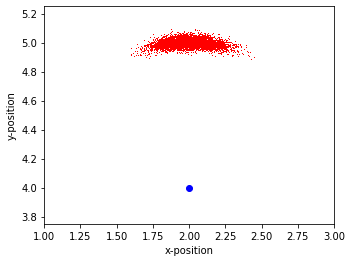

In [3]:
import numpy as np
x = [2, 4, 0]
u = [np.pi/2, 1, 0]
a = [0.05, 0.05, 0.01, 0.01]

main(x, u, a)

### <center> 2.c [1.0 marks] </center>
##### Evaluate your motion model again and again with the same initial position, odometry reading, and noise parameters. Does the return value of your motion model change or not? Why?

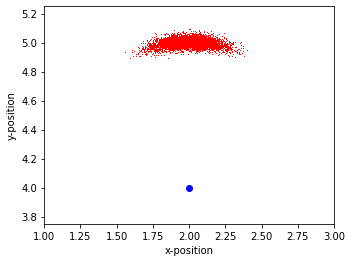

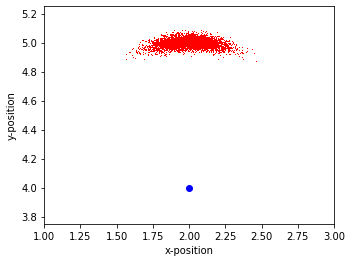

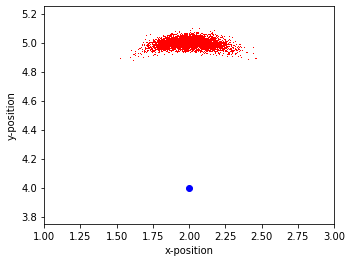

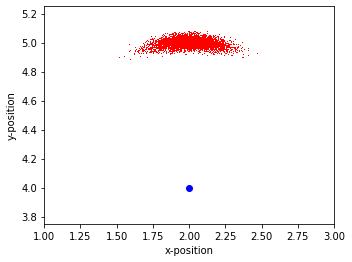

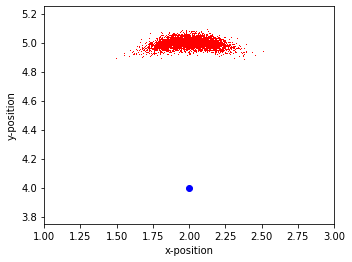

In [4]:
for _ in range(5):
main(x, u, a)

Even though the single points differ every time the algorithm is executed, the general "sickle" shape of the return values as well as distance to the robots position does not change. To change those, the odometry parameters and the initial pose would need to be changed.

### <center> 2.d [1.0 marks] </center>
##### Comment on the effect of changing the noise parameters to $\alpha = [0.01, 0.01, 0.01, 0.01]^T$ on the spread of the predicted (x, y) positions.

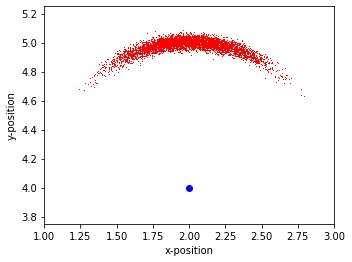

In [6]:
x = [2, 4, 0]
u = [np.pi/2, 1, 0]
a = [0.1, 0.1, 0.01, 0.01]

main(x, u, a)

With the $\alpha_1$ and $\alpha_2$ values doubled the spread of the estimated positions around the robot also increases. $\alpha_1$ and $\alpha_2$ correspond to the rotation noise for the robot, with higher values, a broader field of possible positions has to be expected (around the transverse plane of the robot). The other noise parameters are not changed, so the translation (sagital plane) are not affected.

### <center> 2.e [1.0 marks] </center>
##### Comment on the effect of changing the noise parameters to $\alpha = [0.01, 0.01, 0.05, 0.05]^T$ on the spread of the predicted (x, y) positions.

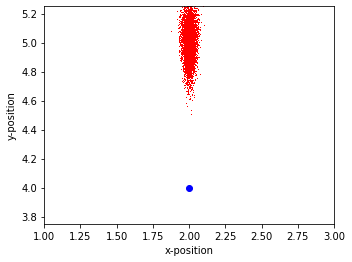

In [7]:
x = [2, 4, 0]
u = [np.pi/2, 1, 0]
a = [0.01, 0.01, 0.05, 0.05]

main(x, u, a)

With the noise now increased for the translation the robot can end up farther back or forth on its sagital plane. As in the previous experiment, the other plane is not affected.

# Attached Code

### lab_2_t_1_framework.py

In [ ]:
#!/usr/bin/env python

import numpy as np
import math
import timeit

"""
T 1 -- Sample From a Normal Distribution
mu -- mean of the normal distribution
sigma -- std_dev of the normal distribution
"""
def sample_twelve_uniform(mu, sigma):
    """Generate samples from a zero-centered normal distribution by summing up
    12 uniform distributed samples, as explained in the lecture. Then, add mu.
    """
    sum_uniform_samples = 0
    for _ in range(12):
        sum_uniform_samples += np.random.uniform(-sigma, sigma)

    return 1 / 2 * sum_uniform_samples + mu

def sample_boxmuller_transform(mu, sigma):
    """The Box-Muller method allows to generate samples from a standard normal
    distribution using two uniformly distributed samples. Then, multiply these
    samples by sigma and add mu.
    """
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)
    z0 = math.cos(2 * math.pi * u2) * math.sqrt(-2 * math.log(u1))
    z1 = math.sin(2 * math.pi * u2) * math.sqrt(-2 * math.log(u1))

    return z0 * sigma + mu, z1 * sigma + mu

def compute_execution_times(mu, sigma, samples_no, sample_function):
    start = timeit.default_timer()
    for i in range(samples_no):
        sample_function(mu, sigma)
    end = timeit.default_timer()
    time_per_sample = (end - start) / samples_no * 1e6
    print("%30s : %.3f us" % (sample_function.__name__, time_per_sample))

def compute_sample_mean_and_std_dev(mu, sigma, samples_no, sample_function):
    samples = []
    for i in range(samples_no):
        samples.append(sample_function(mu, sigma))
    print("%30s : mean = %.3f, std_dev = %.3f" % (sample_function.__name__, np.mean(samples), np.std(samples)))

def main():
   mu, sigma = 10.0, 4.0

   samples_no = 10000

   sample_functions = [
       sample_twelve_uniform,
       sample_boxmuller_transform,
       np.random.normal
       ]

   print("Computing execution times as well as sample means and std_devs with:" )
   print(" mean :", mu)
   print(" std_dev :", sigma)
   print(" samples no:", samples_no)

   for function in sample_functions:
       compute_execution_times(mu, sigma, samples_no, function)

   for function in sample_functions:
       compute_sample_mean_and_std_dev(mu, sigma, samples_no, function)

#if __name__ == "__main__":
#    main()



### lab_2_t_2_framework.py

In [ ]:
#!/usr/bin/env python

import math
import numpy as np
import matplotlib.pyplot as plt

#global variable counter
counter = 1

"""
T 2 -- Sample Odometry Motion Model
"""

"""
2.a
"""
def sample_odometry_motion_model(x, u, a):
    """ Parameters:
    [x[0],x[1],x[2]] = [x, y, theta]
    [u[0],u[1],u[2]] = [rot1, trans, rot2]
    [a[0],a[1],a[2],a[3]] = [a1, a2, a3, a4]
    """
    # extract to more readable variables as in the formula given
    _x, y, theta = x
    rot1, trans, rot2 = u
    a1, a2, a3, a4 = a

    # Estimate first Rotation
    estimate_delta_rot1 = rot1 + np.random.normal(0, a1 * abs(rot1) + a2 * trans)

    # Estimate first Translation
    estimate_delta_trans = trans + np.random.normal(0, a3 * trans + a4 * (abs(rot1) + abs(rot2)))

    # Estimate second Rotation
    estimate_delta_rot2 = rot2 + np.random.normal(0, a1 * abs(rot2) + a2 * trans)

    #Calculate new pose based on estimates
    x_new = _x + estimate_delta_trans * np.cos(theta + estimate_delta_rot1)
    y_new = y + estimate_delta_trans * np.sin(theta + estimate_delta_rot1)
    theta_new = theta + estimate_delta_rot1 + estimate_delta_rot2

    return np.array([x_new, y_new, theta_new])

def plot_and_save(x, x_prime):
    global counter
    plt.plot(x[0], x[1], "bo")
    plt.plot(x_prime[:,0], x_prime[:,1], "r,")
    plt.xlim([1, 3])
    plt.ylim([3.75, 5.25])
    axes = plt.gca()
    axes.set_aspect('equal')
    plt.xlabel("x-position")
    plt.ylabel("y-position")
    plt.savefig("./output/pdf/samples_from_odometry_" + str(counter) + ".pdf")
    plt.savefig("./output/images/samples_from_odometry_" + str(counter) + ".png")
    counter += 1
    plt.show()

def main(x, u, a):
    samples_no = 5000

    x_prime = np.zeros([samples_no, 3])
    for i in range(0, samples_no):
        x_prime[i,:] = sample_odometry_motion_model(x,u,a)

    plot_and_save(x, x_prime)

